## **Importing Packages**

In [2]:
!pip install -U graphviz scikit-learn neptune-xgboost xgboost hyperopt mlflow deepchecks
!pip install -U "neptune[xgboost]"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

## **Reading and Merging Data**



In [5]:
path = '/content/drive/MyDrive/Loan prediction/Credit_Risk_Dataset.xlsx'

# Reading multiple sheets from the Excel file
dfs = pd.read_excel(path, sheet_name=['loan_information', 'Employment', 'Personal_information', 'Other_information'])

loan_information = dfs['loan_information']
employment = dfs['Employment']
personal_information = dfs['Personal_information']
other_information = dfs['Other_information']

In [6]:
employment

,User id,Employmet type,Tier of Employment,Industry,Role,Work Experience,Total Income(PA)
0,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,1-2,125000.0
1,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,10+,61000.0
2,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,5-10,100000.0
3,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,2-3,30000.0
4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,10+,65000.0
...,...,...,...,...,...,...,...
134412,55993166,NaN,NaN,0,KHMbckjadbckIFGTNSEWdkcndwkcnCCM,0,100000.0
134413,56263229,NaN,NaN,0,KHMbckjadbckIFGOHSEWdkcndwkcnCCM,0,27000.0
134414,55992716,NaN,NaN,0,KHMbckjadbckIFGCASEWdkcndwkcnCCM,0,53000.0
134415,56363313,NaN,NaN,0,KHMbckjadbckIFGVASEWdkcndwkcnCCM,0,75400.0


In [7]:
# Merge 'loan_information' and 'Employment' dataframes based on 'User_id'
merged_df = pd.merge(loan_information, employment, left_on='User_id', right_on='User id')

# Merge the previously merged dataframe with 'personal_information' based on 'User_id'
merged_df = pd.merge(merged_df, personal_information, left_on='User_id', right_on='User id')

# Merge the previously merged dataframe with 'other_information' based on 'User_id'
merged_df = pd.merge(merged_df, other_information, left_on='User_id', right_on='User_id')

df=merged_df
# Display the first few rows of the merged dataframe
df.head()

,User_id,Loan Category,Amount,Interest Rate,Tenure(years),User id_x,Employmet type,Tier of Employment,Industry,Role,...,Home,Pincode,Social Profile,Is_verified,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
0,7013527,Consolidation,55884.0,11.84,6,7013527,Salaried,B,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGAZSEWdkcndwkcnCCM,...,rent,XX852X,No,NaN,0,1824.150000,971.46,852.69,0,1
1,7014291,Consolidation,55511.0,16.94,4,7014291,Self - Employeed,D,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNCSEWdkcndwkcnCCM,...,mortgage,XX286X,NaN,Source Verified,0,22912.532998,18000.00,4912.53,0,0
2,7014327,Consolidation,12289.0,11.84,6,7014327,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGNYSEWdkcndwkcnCCM,...,own,XX113X,No,NaN,0,7800.440000,4489.76,3310.68,0,1
3,7014304,Credit Card,29324.0,14.71,4,7014304,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX941X,Yes,NaN,0,6672.050000,5212.29,1459.76,0,0
4,7031995,Credit Card,30252.0,14.71,4,7031995,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,KHMbckjadbckIFGCASEWdkcndwkcnCCM,...,rent,XX913X,No,Verified,0,11793.001345,10000.00,1793.00,0,0


## **Exploratory Data Analysis & Data Preparation**
****






















In [8]:
# Display data types for each column in the DataFrame. Goal is to see if there is any column with the wrong data type.
df.dtypes

User_id                 int64
Loan Category          object
Amount                float64
Interest Rate         float64
Tenure(years)           int64
User id_x               int64
Employmet type         object
Tier of Employment     object
Industry               object
Role                   object
Work Experience        object
Total Income(PA)      float64
User id_y               int64
Gender                 object
Married                object
Dependents              int64
Home                   object
Pincode                object
Social Profile         object
Is_verified            object
Delinq_2yrs             int64
Total Payement        float64
Received Principal    float64
Interest Received     float64
Number of loans         int64
Defaulter               int64
dtype: object

In [9]:
# We can use describe pandas function to learn basic statistics of all numerical columns in our data.
df.describe()

,User_id,Amount,Interest Rate,Tenure(years),User id_x,Total Income(PA),User id_y,Dependents,Delinq_2yrs,Total Payement,Received Principal,Interest Received,Number of loans,Defaulter
count,1.437270e+05,1.118030e+05,143727.000000,143727.000000,1.437270e+05,1.437270e+05,1.437270e+05,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000,143727.000000
mean,3.733474e+07,1.376458e+05,12.038703,4.514503,3.733474e+07,7.242256e+04,3.733474e+07,1.997113,0.276601,10840.882025,8407.001538,2352.729746,0.005573,0.093712
std,3.182811e+07,1.575427e+05,3.880204,0.874241,3.182811e+07,5.539328e+04,3.182811e+07,1.411317,0.789019,8613.421536,7224.396032,2447.759754,0.098785,0.291429
min,2.080360e+05,0.000000e+00,5.420000,4.000000,2.080360e+05,4.000000e+03,2.080360e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.276118e+06,2.837950e+04,9.180000,4.000000,3.276118e+06,4.500000e+04,3.276118e+06,1.000000,0.000000,4674.775000,3104.160000,841.685000,0.000000,0.000000
50%,5.766517e+07,7.660300e+04,11.840000,4.000000,5.766517e+07,6.180000e+04,5.766517e+07,2.000000,0.000000,8212.410000,6000.000000,1632.240000,0.000000,0.000000
75%,6.729174e+07,2.054645e+05,14.440000,6.000000,6.729174e+07,8.600000e+04,6.729174e+07,3.000000,0.000000,14175.769677,11664.365000,2904.770000,0.000000,0.000000
max,7.895894e+07,8.000078e+06,23.540000,6.000000,7.895894e+07,7.141778e+06,7.895894e+07,4.000000,22.000000,57777.579870,35000.010000,24205.620000,5.000000,1.000000


### **Handling Missing Values in Data**

In [10]:
# Let's check how many missing values do we have in each column in our dataframe
df.isnull().sum()

User_id                   0
Loan Category             0
Amount                31924
Interest Rate             0
Tenure(years)             0
User id_x                 0
Employmet type        84642
Tier of Employment    84642
Industry                  4
Role                      0
Work Experience           4
Total Income(PA)          0
User id_y                 0
Gender                    0
Married               48143
Dependents                0
Home                      0
Pincode                   0
Social Profile        47856
Is_verified           35803
Delinq_2yrs               0
Total Payement            0
Received Principal        0
Interest Received         0
Number of loans           0
Defaulter                 0
dtype: int64

In [11]:
# Drop rows with missing values in the 'Industry' and 'Work Experience' columns as the data in 'Industry' is meaningless due to encryption, and 'Work Experience' is inconsistent in the dataset, treating it as an object datatype variable which may impact model performance.
df = df.dropna(subset=['Industry', 'Work Experience'])

In [12]:
# Call the function to replace null values with "missing"
replace_with='missing'
columns_to_replace = ['Social Profile', 'Is_verified', 'Married', 'Employmet type']

def replace_null_values_with_a_value(df, columns_to_replace, replace_with):
    for column in columns_to_replace:
        df[column].fillna(replace_with, inplace=True)
    return df

df= replace_null_values_with_a_value(df, columns_to_replace, replace_with)

<ipython-input-12-976e7e3931b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(replace_with, inplace=True)


In [13]:
#Create a new variable "amount_missing" to indicate if the 'Amount' is missing or not. Assign 1 if 'Amount' is null, otherwise assign 0.
df['amount_missing'] = np.where(df['Amount'].isnull(), 1, 0)

#Replace the null values in the 'Amount' column with the value "-1000" to differentiate them from the rest of the data.
replace_with= - 1000
columns_to_replace = ['Amount']

df= replace_null_values_with_a_value(df, columns_to_replace,replace_with)

<ipython-input-13-9befbefbb646>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['amount_missing'] = np.where(df['Amount'].isnull(), 1, 0)
<ipython-input-12-976e7e3931b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(replace_with, inplace=True)


In [14]:
# Replace the null values in the 'Tier of Employment' column with the string "Z" to categorize them separately.
replace_with='Z'
columns_to_replace = ['Tier of Employment']

df= replace_null_values_with_a_value(df, columns_to_replace,replace_with)

<ipython-input-12-976e7e3931b8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].fillna(replace_with, inplace=True)


In [15]:
#Check for null rows in the DataFrame to confirm if the data is clean and does not contain any missing values that could potentially impact the performance of the model.
df.isnull().sum()

User_id               0
Loan Category         0
Amount                0
Interest Rate         0
Tenure(years)         0
User id_x             0
Employmet type        0
Tier of Employment    0
Industry              0
Role                  0
Work Experience       0
Total Income(PA)      0
User id_y             0
Gender                0
Married               0
Dependents            0
Home                  0
Pincode               0
Social Profile        0
Is_verified           0
Delinq_2yrs           0
Total Payement        0
Received Principal    0
Interest Received     0
Number of loans       0
Defaulter             0
amount_missing        0
dtype: int64

### **Drop categorical columns with too many categories**

In [16]:
# Call the function to print the number of unique values in all columns
df.isnull().sum()

User_id               0
Loan Category         0
Amount                0
Interest Rate         0
Tenure(years)         0
User id_x             0
Employmet type        0
Tier of Employment    0
Industry              0
Role                  0
Work Experience       0
Total Income(PA)      0
User id_y             0
Gender                0
Married               0
Dependents            0
Home                  0
Pincode               0
Social Profile        0
Is_verified           0
Delinq_2yrs           0
Total Payement        0
Received Principal    0
Interest Received     0
Number of loans       0
Defaulter             0
amount_missing        0
dtype: int64

In [17]:
# Dropping Industry Column and User_IDs as it doesn't give any significant information
# Drop 'Pincode' column: Considering privacy concerns, the 'Pincode' data is encrypted. To address these concerns, it is prudent to remove the 'Pincode' column from the dataset.
columns_to_drop = ['Industry', 'User_id','User id_x','User id_y','Pincode','Role']

# Call the function to drop columns
df = df.drop(columns = columns_to_drop)

### **Multicollinearity**

<ipython-input-18-9c88018f14e5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


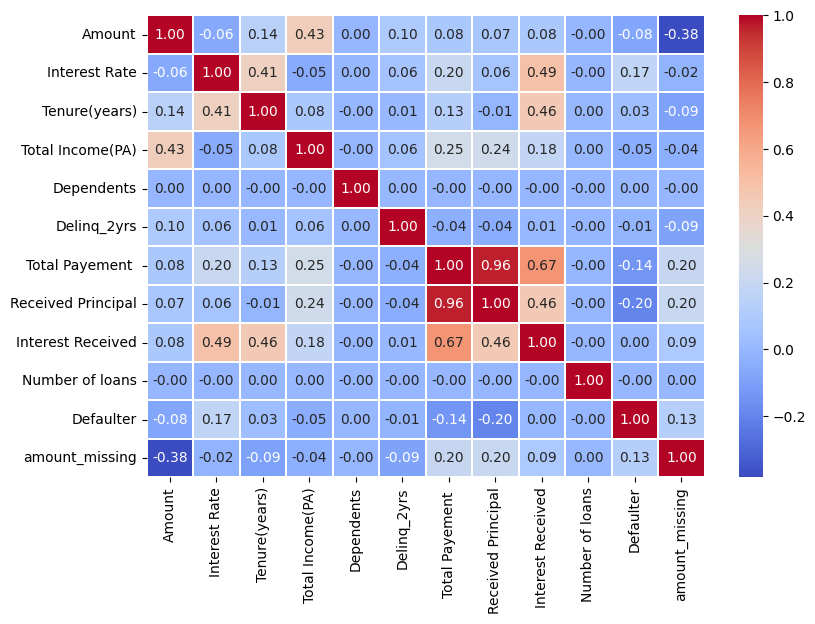

In [18]:
corr = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 6))

# Draw the heatmap
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm", fmt=".2f", linewidths=.05)

# Show the plot
plt.show()

**Observation from the heatmap**

No two variables have high correlation with each other, so there is no issue of multicollinearity. It's safe to use all variables in machine learning model building.


**Spearman Correlation Coefficient**

Spearman works best if there are nonlinear relationships between different variables.


####**Scatter Plots to visualize correlations between x variables**

The following code generates a scatter plot matrix, also known as a pair plot, of all numeric features in the input DataFrame using the seaborn library.

The diagonal of the plot matrix shows a histogram of each variable's distribution. This allows for visual inspection of the pairwise relationships between variables, which can be useful for identifying patterns, trends, correlations, or potential outliers in the data.

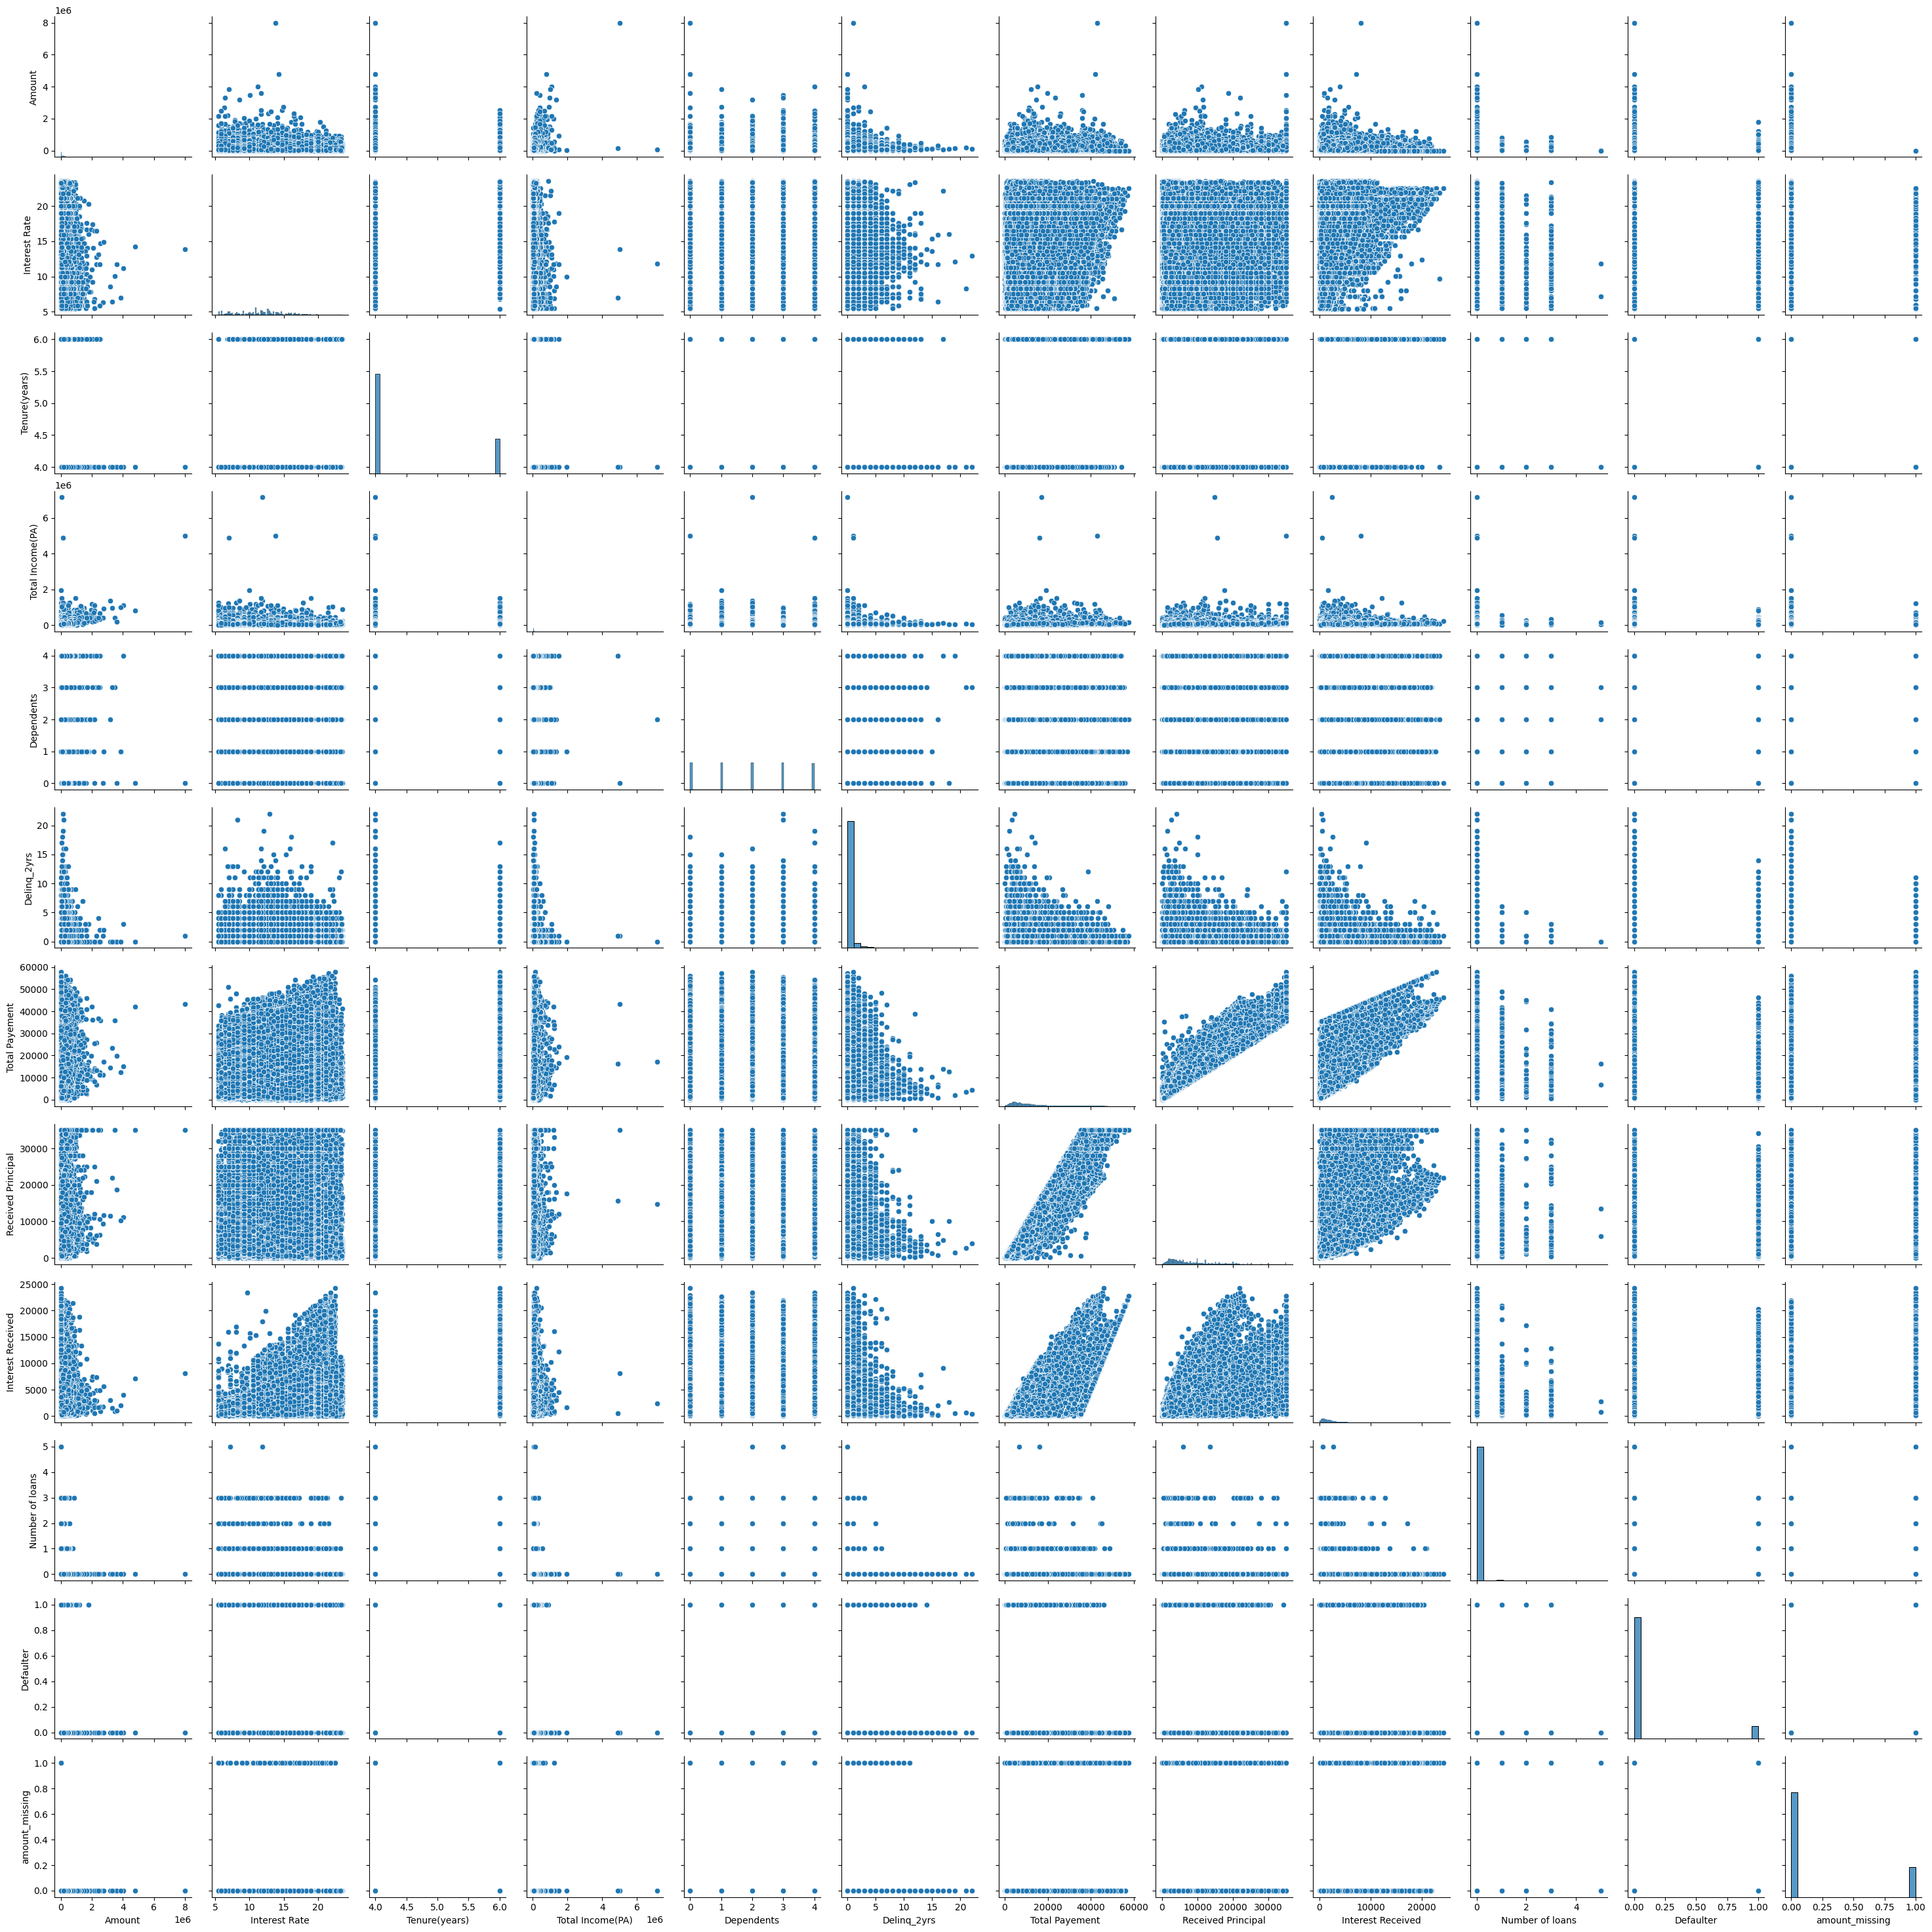

In [19]:
sns.pairplot(df)
plt.show()


**Analysis**

****

- Scatterplots can help us confirm multicollinearity between two variables. We  can look at the scatterplot to check if there is any pattern or correlation between two variables.**

- Multicollinearity makes explainability less trustworthy as change in one variablte will not only impact the target variable but also impact other X variables. Means how much does a variable impact target variable would be hard



### **Skewness**

#### **Understand Skewness**

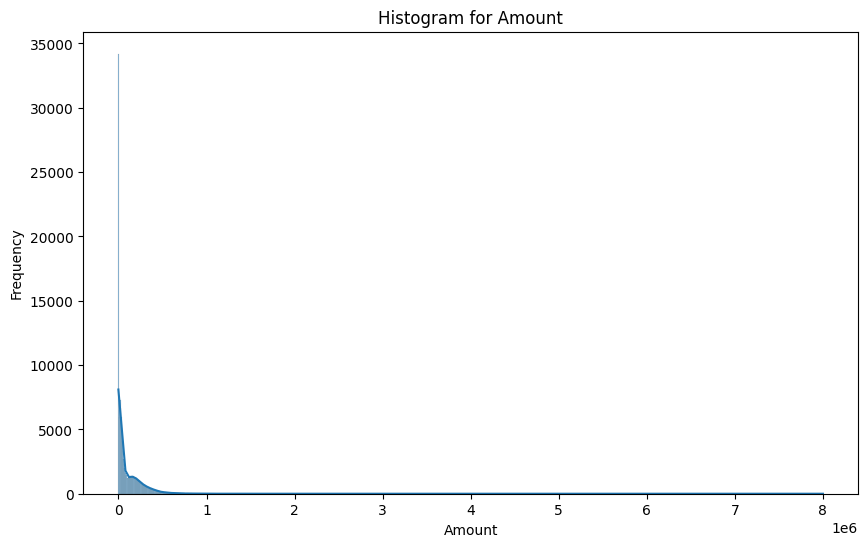

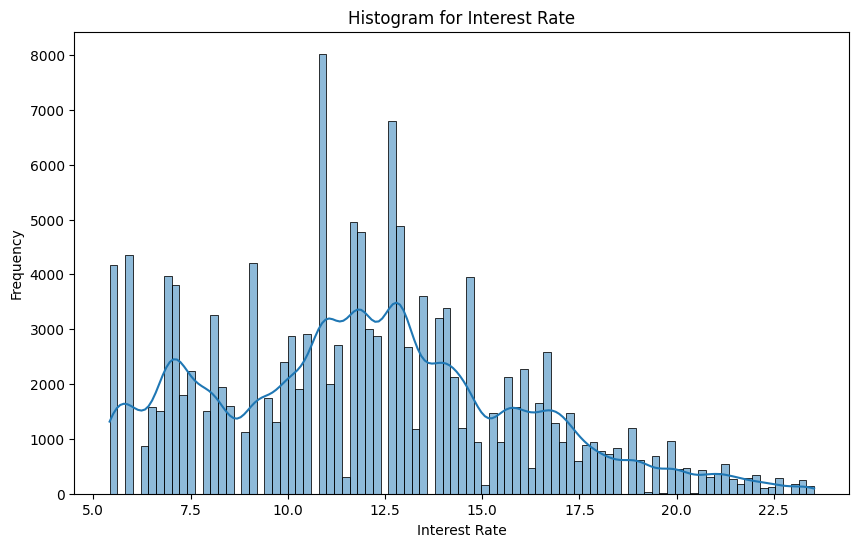

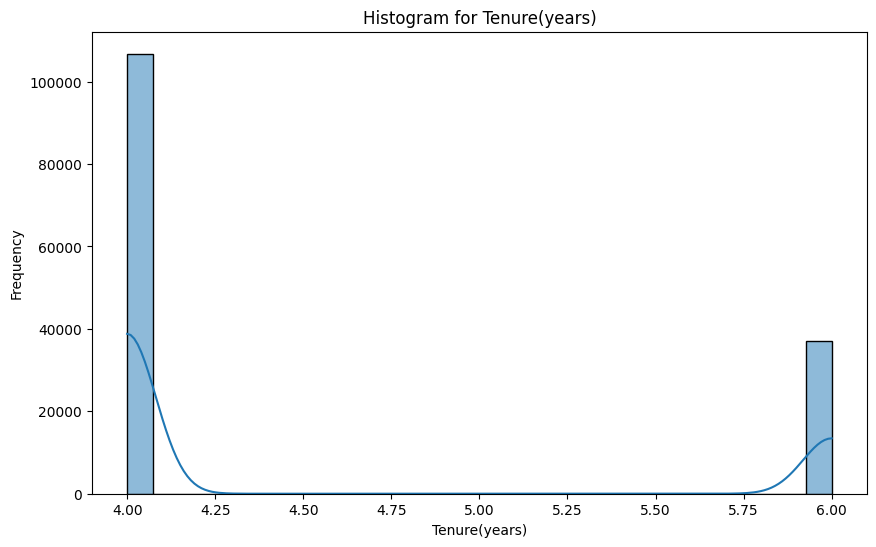

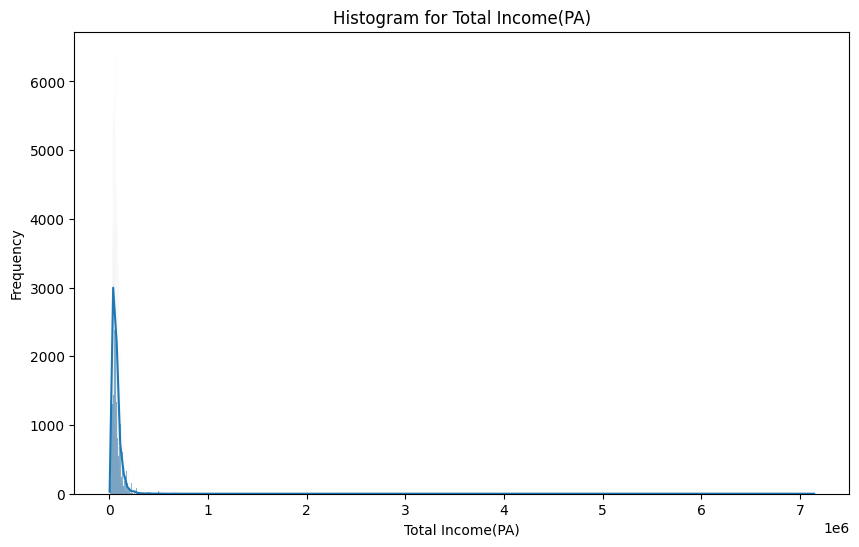

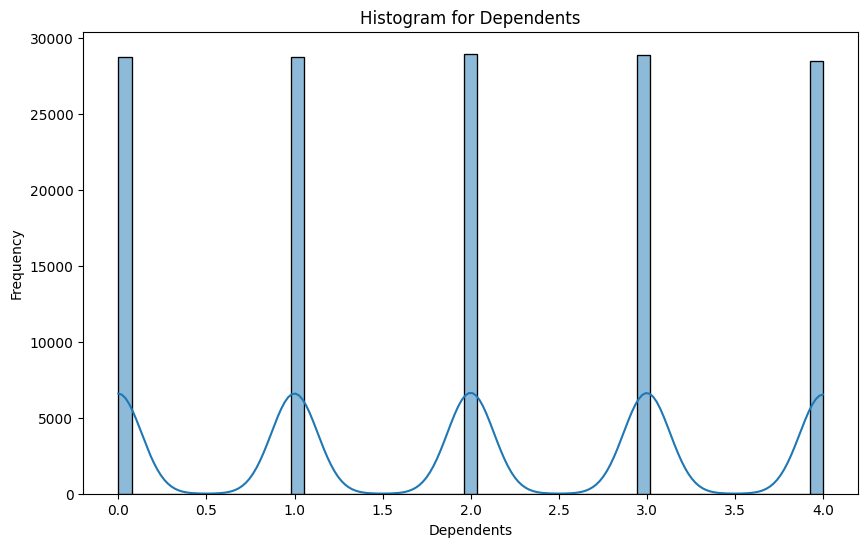

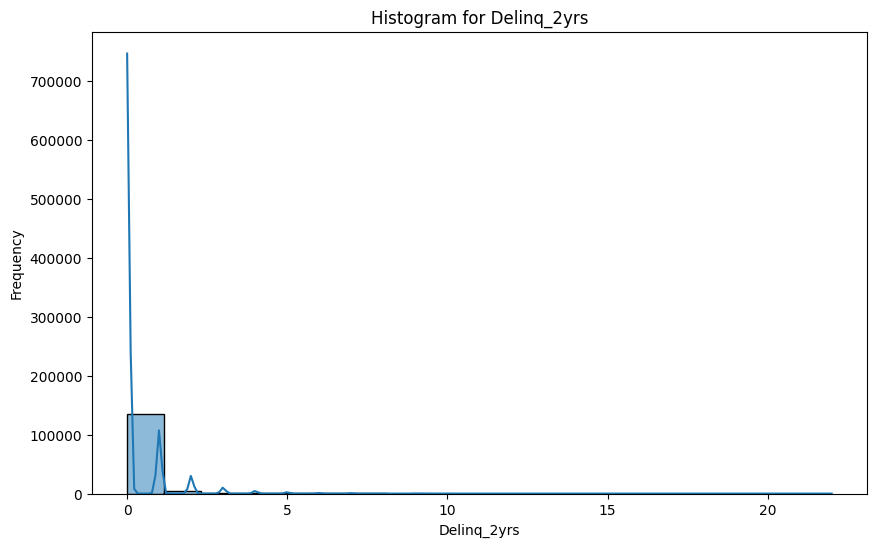

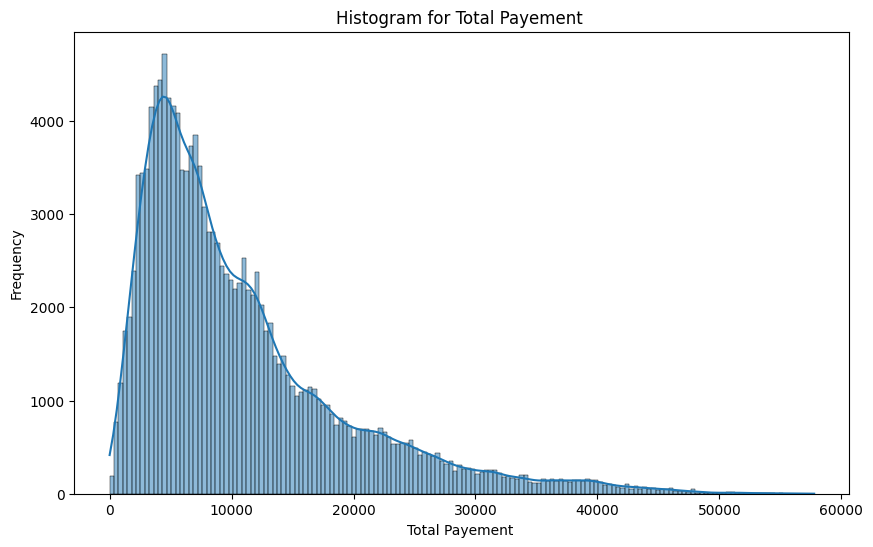

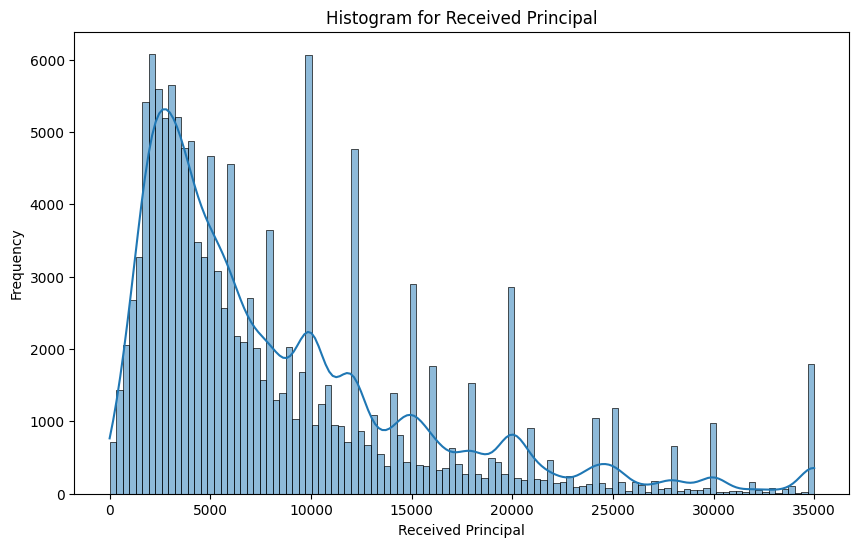

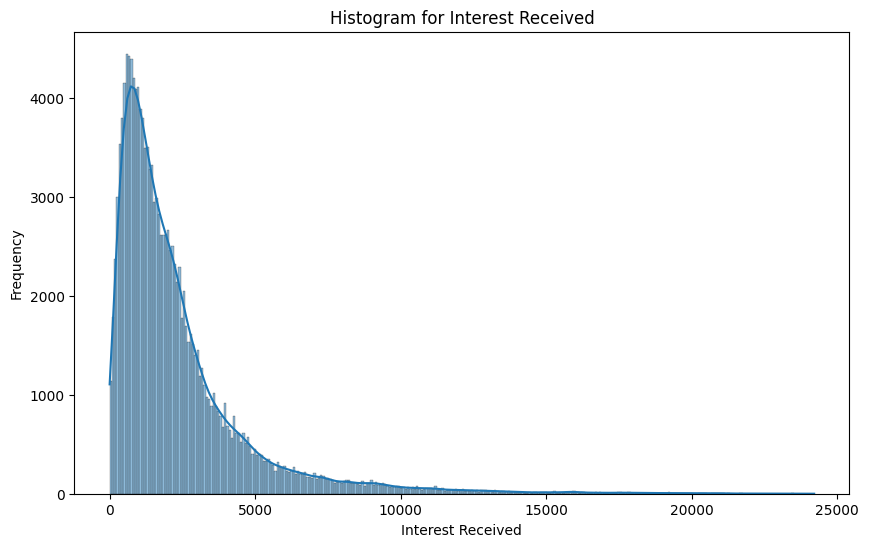

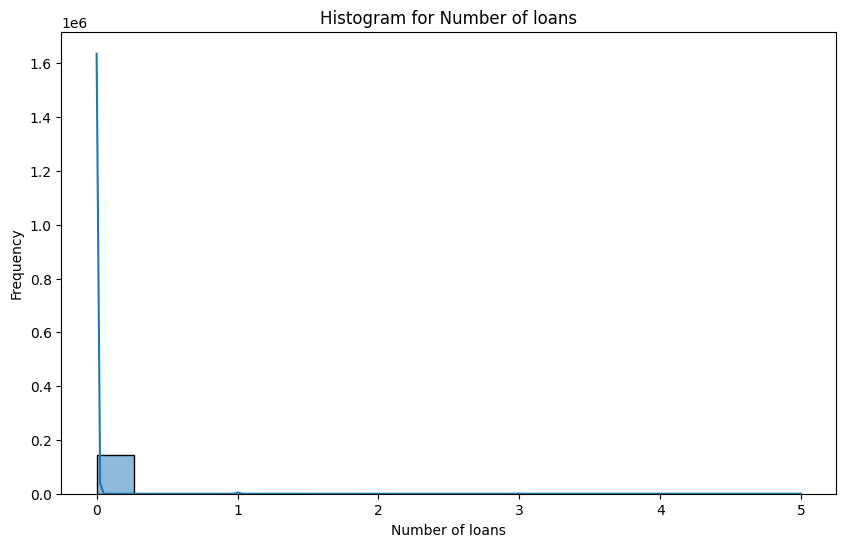

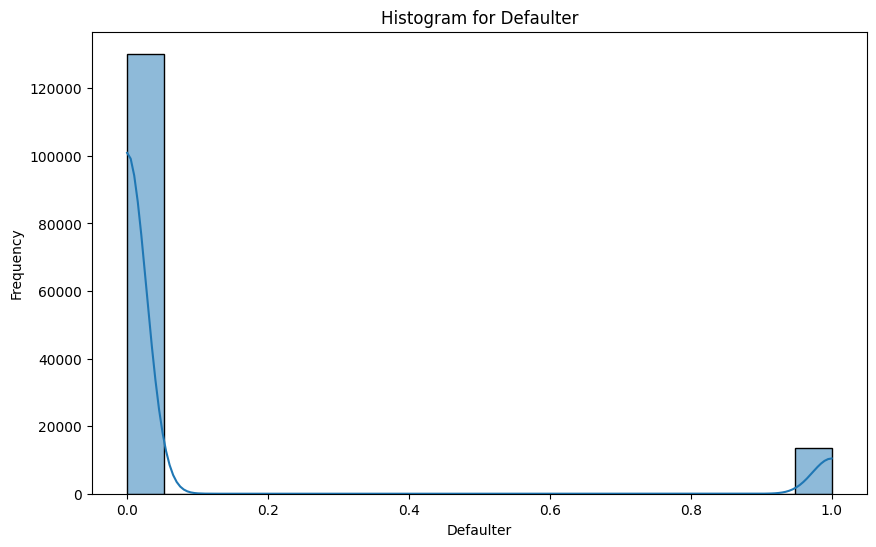

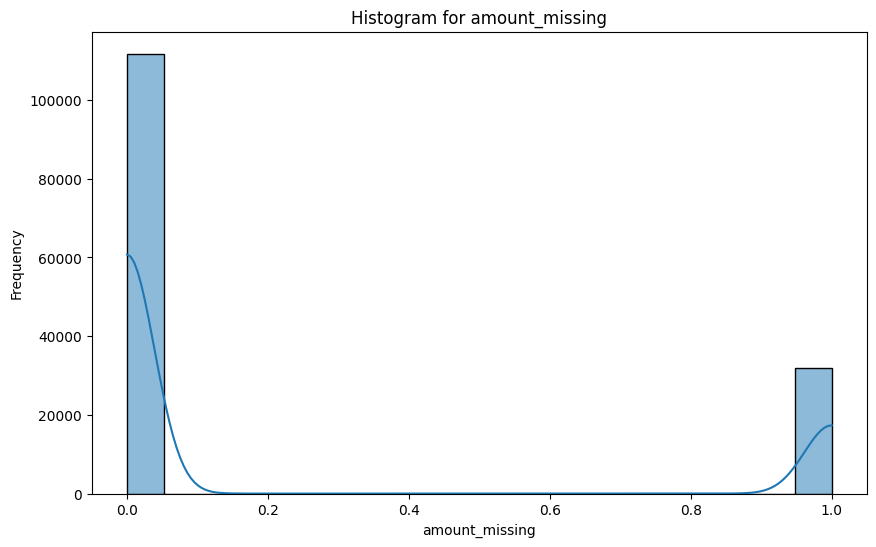

In [20]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
for column in num_columns:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[column], kde=True)  # Use sns.distplot if you're on an older version of Seaborn
  plt.title(f'Histogram for {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.show()

**Analysis after Distribution:**

1. Amount: The distribution of the 'Amount' variable is right-skewed, indicating that a majority of loan amounts are lower, while a few instances have higher values.

2. Employment Type: The distribution of the 'Employment Type' variable shows an imbalance, suggesting that certain employment types may be overrepresented in the dataset compared to others.

3. Work Experience: The 'Work Experience' variable also exhibits imbalanced data, implying that certain levels of work experience may be more prevalent than others.

4. Pincode: The 'Pincode' variable contains a large number of categories, which may pose challenges for analysis. Considering converting it into latitude and longitude coordinates could offer a more manageable representation.

5. Delinq_2years: The distribution of the 'Delinq_2years' variable is right-skewed, indicating that most individuals have a low number of delinquencies, while a few have a higher count.

6. Payment: The 'Payment' variable displays a right-skewed distribution, suggesting that the majority of payment amounts are lower, with a few instances of higher payments.
7. Received Principal: The distribution of the 'Received Principal' variable is right-skewed, indicating that most individuals have received a lower principal amount, while a few have received a higher amount.

8. Interest Received: The 'Interest Received' variable exhibits a right-skewed distribution, suggesting that the majority of individuals have received a lower interest amount, while a few have received a higher interest payment.

#### **Fixing Skewness in the Data**

**Let's print skewness in each feature and use log transformation to fix skewness.**

**Note**

It is important to note that there are numerous features in the dataset with a value of 0. To address this issue and normalize the data, we can apply a log transformation specifically to the non-zero values. By taking the logarithm of these values, we can achieve a more symmetric distribution and reduce the impact of extreme values. This transformation can be particularly useful when working with skewed data or variables that exhibit a wide range of values.

Let's only transform features if skewness is in the following range
* **Skewness < -3 OR Skewness > 3**


In [21]:
# Add all the features to check and fix skewness in features_log array
features_log= ['Amount','Interest Rate','Tenure(years)','Dependents','Total Payement ','Received Principal','Interest Received']

# df= fix_skewness(df, features_log)
for feature in features_log:
  skewness = df[feature].skew()
  print(f"Skewness for {feature}: {skewness}")

        # Check the skewness criteria
  if skewness < -3 or skewness > 3:
    df[feature] = df[feature].apply(lambda x: np.log(x) if x > 0 else x)
    print(f"Skewness for {feature} after log transformation: {df[feature].skew()}")

Skewness for Amount: 4.263131668127465
Skewness for Amount after log transformation: -1.3370425366313607
Skewness for Interest Rate: 0.35701836819248667
Skewness for Tenure(years): 1.110725712963069
Skewness for Dependents: 0.0009324906324210873
Skewness for Total Payement : 1.56758246496732
Skewness for Received Principal: 1.5217975693302848
Skewness for Interest Received: 2.8360693754096626


### **One Hot Encoding of Categorical Features and Ordinal Encoding of Ordinal Features**




#### **Categorical Hot-Encoding**

In [22]:
import pandas as pd

# Add all categorical features for categorical one-hot encoding in categorical_features array
data = df
categorical_features= ["Gender", "Married", "Home", "Social Profile", "Loan Category", "Employmet type","Is_verified", ]

# Perform one-hot encoding using pandas get_dummies() function
encoded_data = pd.get_dummies(data, columns=categorical_features)



#### **Ordinal Encoding**

In [23]:
# Define the ordinal categorical features array
ordinal_features = ["Tier of Employment", "Work Experience"]

# Define the pandas DataFrame for encoding
data = encoded_data

# Create a custom mapping of categories to numerical labels
tier_employment_order= list(encoded_data["Tier of Employment"].unique())
tier_employment_order.sort()

work_experience_order= [ 0, '<1', '1-2', '2-3', '3-5', '5-10','10+']

custom_mapping = [tier_employment_order, work_experience_order]

for feature, mapping in zip(ordinal_features, custom_mapping):
  cat_type = CategoricalDtype(categories=mapping, ordered=True)
  data[feature] = data[feature].astype(cat_type).cat.codes

In [24]:
data

,Amount,Interest Rate,Tenure(years),Tier of Employment,Work Experience,Total Income(PA),Dependents,Delinq_2yrs,Total Payement,Received Principal,...,Loan Category_Home,Loan Category_Medical,Loan Category_Other,Employmet type_Salaried,Employmet type_Self - Employeed,Employmet type_missing,Is_verified_Not Verified,Is_verified_Source Verified,Is_verified_Verified,Is_verified_missing
0,10.931033,11.84,6,1,2,125000.0,4,0,1824.150000,971.46,...,0,0,0,1,0,0,0,0,0,1
1,10.924336,16.94,4,3,6,61000.0,1,0,22912.532998,18000.00,...,0,0,0,0,1,0,0,1,0,0
2,9.416460,11.84,6,7,5,100000.0,3,0,7800.440000,4489.76,...,0,0,0,0,0,1,0,0,0,1
3,10.286162,14.71,4,7,3,30000.0,1,0,6672.050000,5212.29,...,0,0,0,0,0,1,0,0,0,1
4,10.317318,14.71,4,7,6,65000.0,3,0,11793.001345,10000.00,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143722,12.569201,12.06,6,7,0,100000.0,2,1,12842.400000,7193.83,...,0,0,0,0,0,1,0,1,0,0
143723,10.811988,14.10,4,7,0,27000.0,3,0,839.200000,581.67,...,0,0,1,0,0,1,0,1,0,0
143724,9.520175,18.96,6,7,0,53000.0,2,0,6085.800000,2434.49,...,0,0,0,0,0,1,0,0,0,1
143725,12.138452,8.28,4,7,0,75400.0,0,0,4080.640000,3286.82,...,1,0,0,0,0,1,0,1,0,0


### **Fix data imbalance in the target variable**

**Oversampling**

 Increase the number of instances in the minority class (defaulters) by duplicating existing examples or generating synthetic examples to achieve a balanced dataset.

In [ ]:
# Specify the name of the target variable column
#target_column="Defaulter"

#X, y= fix_imbalance_using_oversamping(data, target_column)


**SMOTE**

SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used in machine learning and data mining to address the issue of imbalanced datasets. Imbalanced datasets are characterized by a significant difference in the number of instances between the classes, where one class (the minority class) has a much smaller representation than the other class(es) (the majority class(es)).

SMOTE works by generating synthetic samples for the minority class to balance the class distribution. It does this by creating synthetic examples along the line segments connecting minority class instances. Here's a high-level overview of how SMOTE works:

For each instance in the minority class, SMOTE selects one or more of its k nearest neighbors from the same class. The value of k is a user-defined parameter.
Synthetic samples are created by randomly selecting one or more of the nearest neighbors and using them to form new samples. This is done by interpolating the feature values between the selected instance and its neighbor(s). For example, if there are two nearest neighbors, SMOTE can create a synthetic sample by taking a weighted average of the feature values of the two neighbors.
The synthetic samples are added to the dataset, effectively increasing the representation of the minority class. This process is repeated until the desired balance between the classes is achieved.
SMOTE helps to overcome the problem of imbalanced datasets by increasing the diversity of the minority class and reducing the bias towards the majority class during training. This can improve the performance of machine learning models by ensuring that the model is exposed to a more balanced representation of the data.


In [52]:
pip install imbalanced-learn


In [25]:
import pandas as pd
from imblearn.over_sampling import SMOTE

# # Assuming you have your pandas DataFrame df with features and target variable

# # Separate the features (X) and target variable (y) from the DataFrame
X = data.drop('Defaulter', axis=1)
y = data['Defaulter']

# # Initialize the SMOTE oversampling algorithm
smote = SMOTE(random_state=42)

# # Convert X and y to NumPy arrays
X_array = X.values
y_array = y.values

# # Perform oversampling on the data
X_resampled, y_resampled = smote.fit_resample(X_array, y_array)

# # Convert the resampled arrays back to a pandas DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=X.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['target'])

# # Print the class distribution before and after oversampling
print("Class distribution before oversampling:")
print(y.value_counts())

print("Class distribution after oversampling:")
print(y_resampled_df['target'].value_counts())

X= X_resampled_df
y= y_resampled_df


Class distribution before oversampling:
0    130254
1     13469
Name: Defaulter, dtype: int64
Class distribution after oversampling:
1    130254
0    130254
Name: target, dtype: int64


## **Split Data in training, validation, and testing datasets**

In [29]:
from sklearn.model_selection import train_test_split

#The test_size parameter is set to 0.2, indicating that 20% of the data will be allocated to the testing set, while the remaining 80% will be used for training.
#The random_state parameter is set to 42 to ensure reproducibility of the split, meaning that the same random split will be obtained each time the code is executed.
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

val_x, test_x, val_y, test_y = train_test_split(test_x, test_y, test_size=0.5, random_state=42)


## **Model Training: Xgboost**

### **Import packages**

In [30]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
from hyperopt import fmin, tpe, hp, STATUS_OK
from hyperopt.pyll import scope
import neptune
from neptune.integrations.xgboost import NeptuneCallback


import pickle
from sklearn.metrics import classification_report, confusion_matrix

### **Configure Neptune**

### **Model training with XGBOOST**

**XGBoost hyperparameters**
***
- **Boosting hyperparameters:** Control the gradient descent process in boosting.

- **Tree hyperparameters:** Influence the construction of decision trees.

- **Stochastic hyperparameters:** Determine the subsampling of training data during model building.

- **Regularization hyperparameters:** Regulate model complexity to prevent overfitting.
***

In [42]:
#Defining a function named 'train_model' that takes 'params' as input.
def train_model_xgboost(params, train_x, train_y, test_x, test_y):
    start_time = time.time()

    model = xgb.XGBClassifier(params=params, num_boost_round=5000, verbose_eval=False)

    run_time = time.time() - start_time

    model.fit(train_x, train_y)

    predictions_test = model.predict(test_x)
    mae = mean_absolute_error(test_y, predictions_test)
    return {'status': STATUS_OK, 'loss': mae}

In [43]:
# Define search space for hyperparameter tuning of XGBoost model.
search_space = {
    'learning_rate': hp.loguniform('learning_rate', -7, 0),
    'max_depth': scope.int(hp.uniform('max_depth', 1, 100)),
    'min_child_weight': hp.loguniform('min_child_weight', -2, 3),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'gamma': hp.loguniform('gamma', -10, 10),
    'alpha': hp.loguniform('alpha', -10, 10),
    'lambda': hp.loguniform('lambda', -10, 10),
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'seed': 123,
}
train_x=train_x
train_y=train_y
test_x=test_x
test_y=test_y


# Finding the best hyperparameters using Hyperopt's fmin function.
best_params = fmin(
    fn=lambda params: train_model_xgboost(params, train_x, train_y, test_x, test_y),
    space=search_space,
    algo=tpe.suggest,
    max_evals=15,
    rstate=np.random.default_rng(123)
)
run.stop()

# Let's print the params
print(best_params)


  0%|          | 0/15 [00:00<?, ?trial/s, best loss=?]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:59:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



  7%|▋         | 1/15 [00:06<01:28,  6.29s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:59:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 13%|█▎        | 2/15 [00:31<03:45, 17.36s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [21:59:56] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 20%|██        | 3/15 [00:39<02:36, 13.04s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:00:03] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 27%|██▋       | 4/15 [00:51<02:21, 12.83s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:00:15] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 33%|███▎      | 5/15 [00:58<01:44, 10.46s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:00:21] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 40%|████      | 6/15 [01:09<01:37, 10.79s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:00:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 47%|████▋     | 7/15 [01:15<01:13,  9.25s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:00:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 53%|█████▎    | 8/15 [01:26<01:09,  9.94s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:00:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 60%|██████    | 9/15 [01:35<00:56,  9.47s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:01:00] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 67%|██████▋   | 10/15 [01:44<00:46,  9.26s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:01:08] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 73%|███████▎  | 11/15 [01:54<00:38,  9.52s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:01:18] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 80%|████████  | 12/15 [02:01<00:26,  8.90s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:01:25] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 87%|████████▋ | 13/15 [02:13<00:19,  9.84s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:01:37] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



 93%|█████████▎| 14/15 [02:19<00:08,  8.73s/trial, best loss: 0.014701930827991249]

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:01:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "num_boost_round", "params", "verbose_eval" } are not used.

  warnings.warn(smsg, UserWarning)



100%|██████████| 15/15 [02:32<00:00, 10.19s/trial, best loss: 0.014701930827991249]
{'alpha': 10097.8429974375, 'colsample_bytree': 0.9941458252246209, 'gamma': 4995.254471659089, 'lambda': 6.390134508060656e-05, 'learning_rate': 0.09100767117912448, 'max_depth': 29.65059937692005, 'min_child_weight': 0.1765314436877681, 'subsample': 0.6246406667012787}


### **Best fit xgboost model**


In [46]:
# Access the best hyperparameters
best_hyperparams = {k: best_params[k] for k in best_params}

# Train the final XGBoost model with the best hyperparameters
final_model = xgb.XGBClassifier(
    max_depth=int(best_hyperparams['max_depth']),
    learning_rate=best_hyperparams['learning_rate'],
    gamma=best_hyperparams['gamma'],
    subsample=best_hyperparams['subsample'],
    colsample_bytree=best_hyperparams['colsample_bytree'],
    random_state=42,
    tree_method='hist',enable_categorical= True,  # Use GPU for faster training (if available)
)

final_model.fit(train_x, train_y)  # Train the final model on the entire dataset

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9941458252246209, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=4995.254471659089,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09100767117912448,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

###**Model validation**

In [47]:
# Assuming `test_x` contains your test feature data
# Assuming `test_y` contains your test target labels
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the test data
y_pred = final_model.predict(test_x)

# Print classification metrics
print("Classification Report:")
print(classification_report(test_y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85     12957
           1       0.87      0.83      0.85     13094

    accuracy                           0.85     26051
   macro avg       0.85      0.85      0.85     26051
weighted avg       0.85      0.85      0.85     26051

Confusion Matrix:
[[11326  1631]
 [ 2217 10877]]


## **Model Training: RandomForest**

###**Random forest Grid Search**

In [44]:
def random_forest_classifier_grid_search(param_grid, x_train, y_train):
    # Create a random forest classifier
    rf = RandomForestClassifier()

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(rf, param_grid, cv=2, scoring='accuracy')
    grid_search.fit(x_train, y_train)

    # Print the best parameters found
    return grid_search.best_params_

In [ ]:
# Define your parameter grid
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10]
    }


best_parameters=random_forest_classifier_grid_search(param_grid, train_x, train_y)

best_parameters

**Best Parameters:**
- **'max_depth'**: None
- **'min_samples_split'**: 2
- **'n_estimators'**: 300

###**Model Validation Random Forest**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Access the best hyperparameters
best_hyperparams = {k: best_parameters[k] for k in best_parameters}

# Train the randomforest model with the best hyperparameters
final_model1 = RandomForestClassifier(
    max_depth=best_hyperparams['max_depth'],
    min_samples_split=best_hyperparams['min_samples_split'],
    n_estimators=best_hyperparams['n_estimators'],
     # Use GPU for faster training (if available)
)

final_model1.fit(train_x, train_y)  # Train the final model on the entire dataset


# Assuming `test_x` contains your test feature data
# Assuming `test_y` contains your test target labels


# Make predictions on the test data
y_pred = final_model1.predict(test_x)

# Print classification metrics
print("Classification Report:")
print(classification_report(test_y, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     25937
           1       0.99      1.00      1.00     26165

    accuracy                           1.00     52102
   macro avg       1.00      1.00      1.00     52102
weighted avg       1.00      1.00      1.00     52102

Confusion Matrix:
[[25773   164]
 [    0 26165]]
